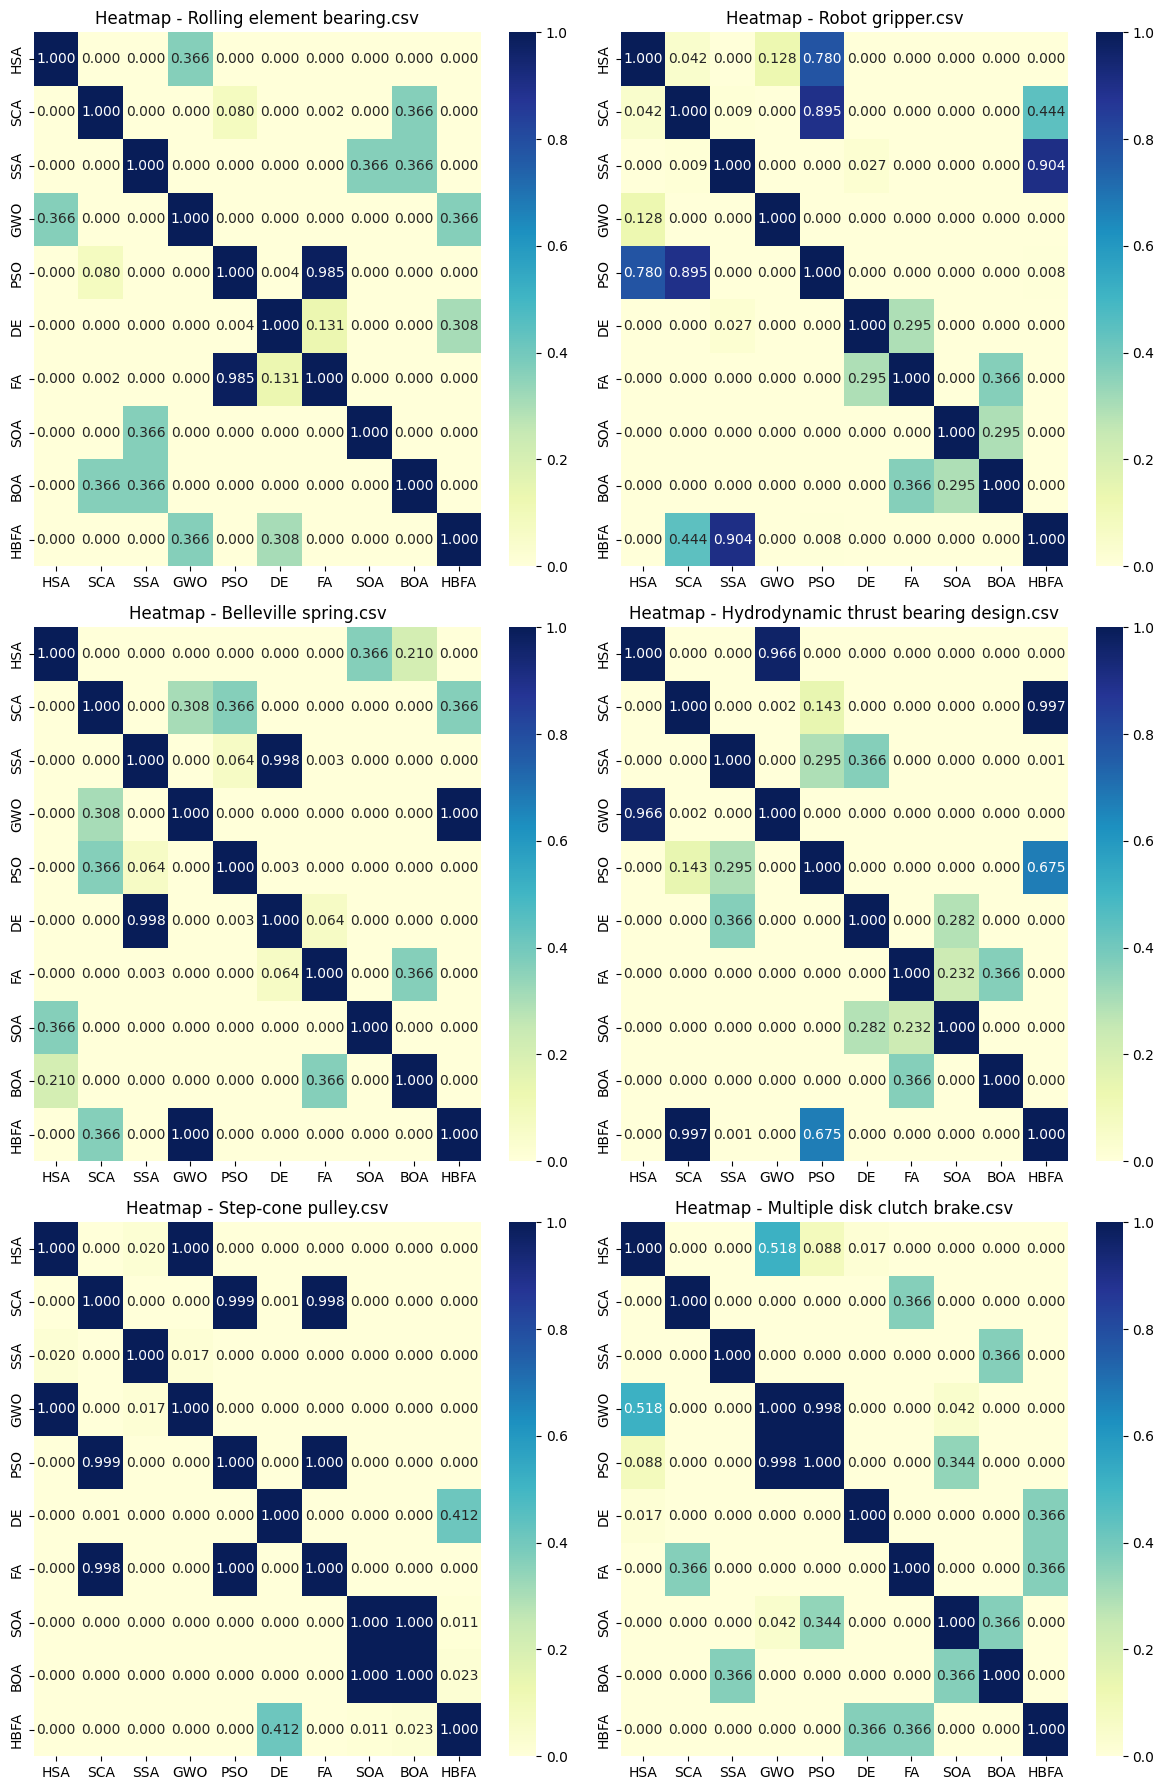

In [ ]:
!pip install scikit-posthocs
import os
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the directory containing the CSV files
directory = "/content/Untitled Folder"  # Update with your directory path

# Create lists to store results
friedman_results = []

# Create a figure and an array of axes for the subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # 3 rows, 2 columns

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Counter for subplot indexing
subplot_index = 0

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        try:
            # Load the data
            df = pd.read_csv(filepath)
            df = df.head(100)

            # Get all algorithm names including HSA (assuming HSA is the first column)
            algorithms = df.columns.tolist()

            # Perform the Friedman test
            data = df[algorithms].values.T
            statistic, p_value = friedmanchisquare(*data)

            # Store Friedman test results
            friedman_results.append([filename, statistic, p_value])

            # Perform the Nemenyi post-hoc test
            posthoc_nemenyi = sp.posthoc_nemenyi_friedman(df[algorithms])

            dataset_name = filename.split("_")[0]  # Extract dataset name from filename

            # Heatmap
            # Pass the algorithm names (index) to the heatmap
            sns.heatmap(posthoc_nemenyi, annot=True, cmap="YlGnBu", fmt=".3f", ax=axes[subplot_index],
                        xticklabels=algorithms, yticklabels=algorithms)
            axes[subplot_index].set_title(f"Heatmap - {dataset_name}")

            # Increment subplot index
            subplot_index += 1

            # If all subplots are filled, break the loop
            if subplot_index >= len(axes):
                break

        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

# Create DataFrame for Friedman test results
friedman_df = pd.DataFrame(friedman_results, columns=["Dataset", "Statistic", "P-value"])

# Add hypothesis test result column
friedman_df["Hypothesis"] = np.where(friedman_df["P-value"] < 0.05, "Reject Null Hypothesis", "Fail to Reject Null Hypothesis")

# Save Friedman test results to CSV
friedman_df.to_csv("friedman_test_results.csv", index=False)

plt.tight_layout()
plt.show()

An error occurred while processing Rolling element bearing.csv: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.
An error occurred while processing Robot gripper.csv: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.
An error occurred while processing Belleville spring.csv: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.
An error occurred while processing Hydrodynamic thrust bearing design.csv: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.
An error occurred while processing Step-cone pulley.csv: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.
An error occurred while processing Multiple disk clutch brake.csv: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.


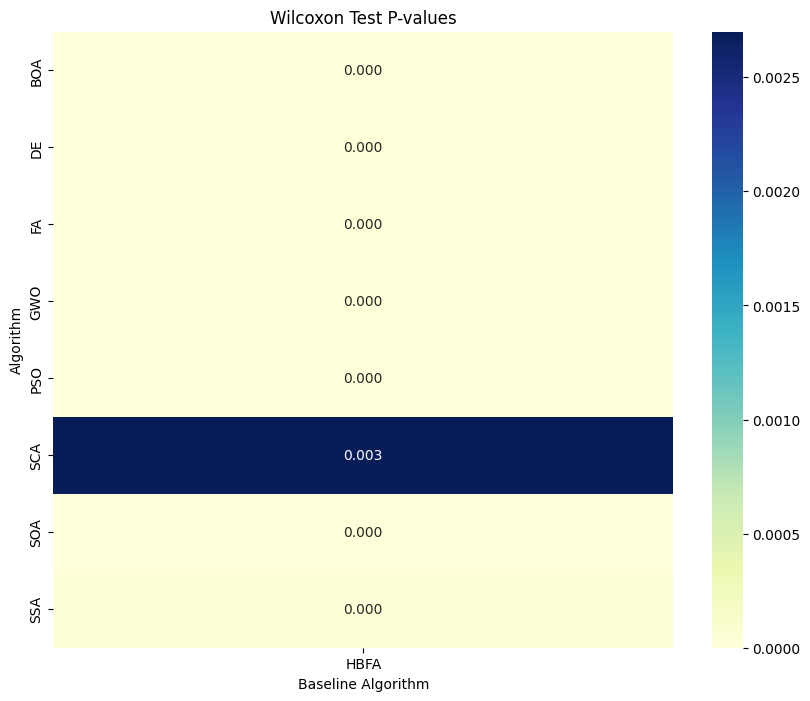

                                   Dataset Baseline Algorithm  Statistic  \
0              Rolling element bearing.csv     HBFA       SCA        0.0   
1              Rolling element bearing.csv     HBFA       SSA        0.0   
2              Rolling element bearing.csv     HBFA       GWO        0.0   
3              Rolling element bearing.csv     HBFA       PSO        0.0   
4              Rolling element bearing.csv     HBFA        DE        0.0   
5              Rolling element bearing.csv     HBFA        FA        0.0   
6              Rolling element bearing.csv     HBFA       SOA        0.0   
7              Rolling element bearing.csv     HBFA       BOA        0.0   
8                        Robot gripper.csv     HBFA       SCA      253.0   
9                        Robot gripper.csv     HBFA       SSA     1441.0   
10                       Robot gripper.csv     HBFA       GWO       53.0   
11                       Robot gripper.csv     HBFA       PSO       28.0   
12          

In [ ]:

import os
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon  # Import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the directory containing the CSV files
directory = "/content/Untitled Folder"  # Update with your directory path

# Create lists to store results
wilcoxon_results = []  # Change to wilcoxon_results

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        try:
            # Load the data
            df = pd.read_csv(filepath)
            df = df.head(100)

            # Get all algorithm names (assuming the first column is a baseline)
            algorithms = df.columns.tolist()[1:]  # Exclude the first column (baseline)
            baseline_algorithm = df.columns[9]  # Get the name of the baseline algorithm

            # Perform Wilcoxon signed-rank test for each algorithm against the baseline
            for algorithm in algorithms:
                statistic, p_value = wilcoxon(df[baseline_algorithm], df[algorithm])
                wilcoxon_results.append([filename, baseline_algorithm, algorithm, statistic, p_value])

        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

# Create DataFrame for Wilcoxon test results
wilcoxon_df = pd.DataFrame(wilcoxon_results, columns=["Dataset", "Baseline", "Algorithm", "Statistic", "P-value"])

# Add hypothesis test result column
wilcoxon_df["Hypothesis"] = np.where(wilcoxon_df["P-value"] < 0.05, "Reject Null Hypothesis", "Fail to Reject Null Hypothesis")

# Save Wilcoxon test results to CSV
wilcoxon_df.to_csv("wilcoxon_test_results.csv", index=False)

# --- Heatmap Plotting ---
# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = wilcoxon_df.pivot_table(index='Algorithm', columns='Baseline', values='P-value')

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Wilcoxon Test P-values")
plt.xlabel("Baseline Algorithm")
plt.ylabel("Algorithm")
plt.show()
# --- End of Heatmap Plotting ---

print(wilcoxon_df)  # Print the results

Not enough data or all differences are zero for Wilcoxon test in F15.xlsx for BOA vs HBFA
Not enough data or all differences are zero for Wilcoxon test in F23.xlsx for BOA vs HBFA
Not enough data or all differences are zero for Wilcoxon test in F20.xlsx for BOA vs HBFA


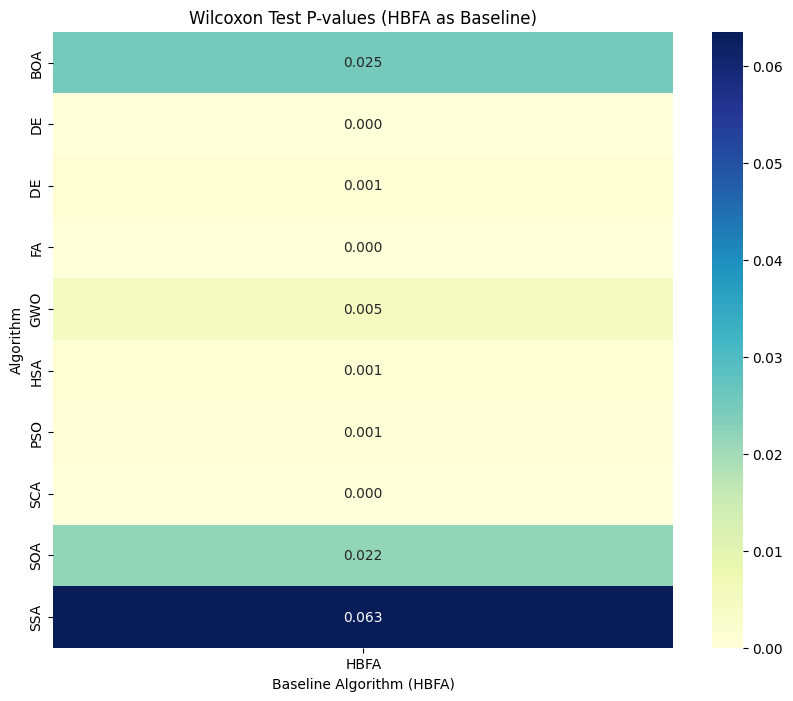

      Dataset Baseline Algorithm  Statistic       P-value  \
0    F14.xlsx     HBFA       HSA        0.0  3.378186e-18   
1    F14.xlsx     HBFA       PSO        0.0  3.359451e-18   
2    F14.xlsx     HBFA       SSA        0.0  3.358855e-18   
3    F14.xlsx     HBFA       SCA        0.0  3.358855e-18   
4    F14.xlsx     HBFA        DE      197.0  1.528132e-15   
..        ...      ...       ...        ...           ...   
199   F6.xlsx     HBFA        DE        0.0  5.543138e-18   
200   F6.xlsx     HBFA        FA       86.0  7.536472e-17   
201   F6.xlsx     HBFA       GWO        2.0  5.870434e-18   
202   F6.xlsx     HBFA       BOA      453.0  1.688898e-12   
203   F6.xlsx     HBFA       SOA      453.0  1.688898e-12   

                 Hypothesis  
0    Reject Null Hypothesis  
1    Reject Null Hypothesis  
2    Reject Null Hypothesis  
3    Reject Null Hypothesis  
4    Reject Null Hypothesis  
..                      ...  
199  Reject Null Hypothesis  
200  Reject Null Hypothesis

In [16]:
!pip install scikit-posthocs
import os
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the directory containing the Excel files
directory = "/content/NEW"  # Update with your directory path

# Create lists to store results
wilcoxon_results = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):
        filepath = os.path.join(directory, filename)
        try:
            # Load the data
            df = pd.read_excel(filepath)
            df = df.head(100)

            # Use HBFA as baseline
            baseline_algorithm = 'HBFA'  # Or use df.columns[index_of_HBFA_column] if you know the index
            algorithms = df.columns.tolist()  # Include all columns

            # Perform Wilcoxon signed-rank test for each algorithm against the baseline
            for algorithm in algorithms:
                if algorithm != baseline_algorithm:  # Avoid comparing HBFA to itself
                    try:
                        # Convert columns to numeric, handle errors
                        baseline_data = pd.to_numeric(df[baseline_algorithm], errors='coerce')
                        algorithm_data = pd.to_numeric(df[algorithm], errors='coerce')

                        # Remove NaN values before performing the test
                        baseline_data = baseline_data[~np.isnan(baseline_data)]
                        algorithm_data = algorithm_data[~np.isnan(algorithm_data)]

                        # Check if there's enough data and if differences are not all zero
                        if len(baseline_data) > 1 and len(algorithm_data) > 1 and not np.all(baseline_data == algorithm_data):
                            statistic, p_value = wilcoxon(baseline_data, algorithm_data)
                            wilcoxon_results.append([filename, baseline_algorithm, algorithm, statistic, p_value])
                        else:
                            print(f"Not enough data or all differences are zero for Wilcoxon test in {filename} for {algorithm} vs {baseline_algorithm}")

                    except Exception as e:
                        print(f"Error during conversion or Wilcoxon test for {filename}, {algorithm}: {e}")

        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

# Create DataFrame for Wilcoxon test results
wilcoxon_df = pd.DataFrame(wilcoxon_results, columns=["Dataset", "Baseline", "Algorithm", "Statistic", "P-value"])

# Add hypothesis test result column
wilcoxon_df["Hypothesis"] = np.where(wilcoxon_df["P-value"] < 0.05, "Reject Null Hypothesis", "Fail to Reject Null Hypothesis")

# Save Wilcoxon test results to CSV
wilcoxon_df.to_csv("wilcoxon_test_results.csv", index=False)

# --- Heatmap Plotting ---
# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = wilcoxon_df.pivot_table(index='Algorithm', columns='Baseline', values='P-value')

# Fill NaN with 1 (or any suitable value) to avoid errors if the heatmap has missing data
heatmap_data = heatmap_data.fillna(1)

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Wilcoxon Test P-values (HBFA as Baseline)")
plt.xlabel("Baseline Algorithm (HBFA)")
plt.ylabel("Algorithm")
plt.show()
# --- End of Heatmap Plotting ---

print(wilcoxon_df)  # Print the results

Not enough data or all differences are zero for Wilcoxon test in F15.xlsx for BOA vs HBFA
Not enough data or all differences are zero for Wilcoxon test in F23.xlsx for BOA vs HBFA
Not enough data or all differences are zero for Wilcoxon test in F20.xlsx for BOA vs HBFA


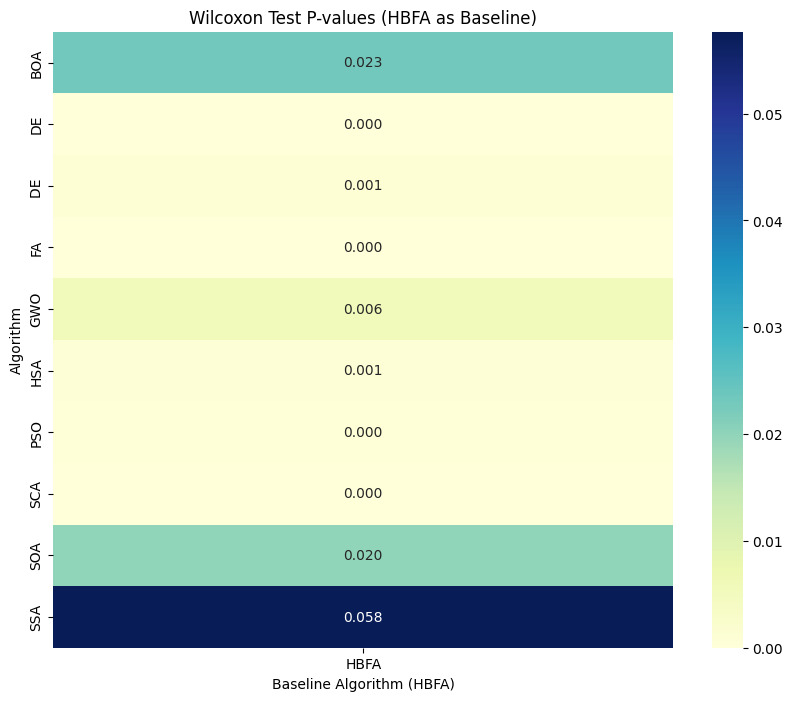

      Dataset Baseline Algorithm  Statistic       P-value  \
0    F14.xlsx     HBFA       HSA        0.0  2.251389e-18   
1    F14.xlsx     HBFA       PSO        0.0  2.239139e-18   
2    F14.xlsx     HBFA       SSA        0.0  2.238749e-18   
3    F14.xlsx     HBFA       SCA        0.0  2.238749e-18   
4    F14.xlsx     HBFA        DE      199.0  1.030552e-15   
..        ...      ...       ...        ...           ...   
199   F6.xlsx     HBFA        DE        0.0  3.791964e-18   
200   F6.xlsx     HBFA        FA       86.0  5.026458e-17   
201   F6.xlsx     HBFA       GWO        2.0  4.013688e-18   
202   F6.xlsx     HBFA       BOA      489.0  2.539759e-12   
203   F6.xlsx     HBFA       SOA      489.0  2.539759e-12   

                 Hypothesis  
0    Reject Null Hypothesis  
1    Reject Null Hypothesis  
2    Reject Null Hypothesis  
3    Reject Null Hypothesis  
4    Reject Null Hypothesis  
..                      ...  
199  Reject Null Hypothesis  
200  Reject Null Hypothesis

In [17]:
!pip install scikit-posthocs
import os
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the directory containing the Excel files
directory = "/content/NEW"  # Update with your directory path

# Create lists to store results
wilcoxon_results = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):
        filepath = os.path.join(directory, filename)
        try:
            # Load the data (using all data)
            df = pd.read_excel(filepath)

            # Use HBFA as baseline
            baseline_algorithm = 'HBFA'  # Or use df.columns[index_of_HBFA_column] if you know the index
            algorithms = df.columns.tolist()  # Include all columns

            # Perform Wilcoxon signed-rank test for each algorithm against the baseline
            for algorithm in algorithms:
                if algorithm != baseline_algorithm:  # Avoid comparing HBFA to itself
                    try:
                        # Convert columns to numeric, handle errors
                        baseline_data = pd.to_numeric(df[baseline_algorithm], errors='coerce')
                        algorithm_data = pd.to_numeric(df[algorithm], errors='coerce')

                        # Remove NaN values before performing the test
                        baseline_data = baseline_data[~np.isnan(baseline_data)]
                        algorithm_data = algorithm_data[~np.isnan(algorithm_data)]

                        # Check if there's enough data and if differences are not all zero
                        if len(baseline_data) > 1 and len(algorithm_data) > 1 and not np.all(baseline_data == algorithm_data):
                            statistic, p_value = wilcoxon(baseline_data, algorithm_data)
                            wilcoxon_results.append([filename, baseline_algorithm, algorithm, statistic, p_value])
                        else:
                            print(f"Not enough data or all differences are zero for Wilcoxon test in {filename} for {algorithm} vs {baseline_algorithm}")

                    except Exception as e:
                        print(f"Error during conversion or Wilcoxon test for {filename}, {algorithm}: {e}")

        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

# Create DataFrame for Wilcoxon test results
wilcoxon_df = pd.DataFrame(wilcoxon_results, columns=["Dataset", "Baseline", "Algorithm", "Statistic", "P-value"])

# Add hypothesis test result column
wilcoxon_df["Hypothesis"] = np.where(wilcoxon_df["P-value"] < 0.05, "Reject Null Hypothesis", "Fail to Reject Null Hypothesis")

# Save Wilcoxon test results to CSV
wilcoxon_df.to_csv("wilcoxon_test_results.csv", index=False)

# --- Heatmap Plotting ---
# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = wilcoxon_df.pivot_table(index='Algorithm', columns='Baseline', values='P-value')

# Fill NaN with 1 (or any suitable value) to avoid errors if the heatmap has missing data
heatmap_data = heatmap_data.fillna(1)

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Wilcoxon Test P-values (HBFA as Baseline)")
plt.xlabel("Baseline Algorithm (HBFA)")
plt.ylabel("Algorithm")
plt.show()
# --- End of Heatmap Plotting ---

print(wilcoxon_df)  # Print the results